## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)


Find core samples of high density and expand clusters from them.

The minimum number of samples in a neighborhood for a point to be considered as a core point was set at 10 and the maximum distance between two samples within the same neighborhood was set at 0.1.


In [55]:
import pandas as pd


df1=pd.read_csv('team_out_1.csv')
df2=pd.read_csv('team_out_a2.csv')

df=df1.append(df2)
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
df=df[df.Total_Expenses>0]
df=df[df.Program_Exp<=1]
df

,Filename,EIN,Program_Exp,Liabilities_To_Asset,Working_Capital,Surplus_Margin,Total_Expenses
0,201523229349300327.xml,510311790.0,0.989619,0.091802,1.574677,-0.078663,4.643180e+05
1,201543089349301829.xml,261460932.0,0.965378,0.000000,3.910347,-0.042674,2.743900e+04
2,201533179349306298.xml,270609504.0,0.942276,0.049206,0.655152,0.088597,3.848280e+05
3,201533209349304768.xml,521548962.0,0.384526,0.000814,30.392756,0.633126,5.091200e+04
4,201533179349307343.xml,731653383.0,0.620560,0.029487,1.083739,0.105901,2.812300e+04
5,201533189349300608.xml,237324566.0,0.758902,0.736982,-0.176215,-0.003914,6.081260e+05
6,201523069349301367.xml,43259150.0,0.736312,0.181998,0.378592,0.057534,2.129680e+05
7,201533069349300963.xml,621273871.0,0.644822,0.234247,14.413163,0.496122,1.426413e+06
8,201523099349300542.xml,541897455.0,0.845659,0.138531,0.414986,-0.016769,4.615120e+05
9,201533099349301033.xml,251869168.0,0.762357,0.000000,8.673984,0.122244,1.020440e+05


small_df=df[df.Total_Expenses<1000000]

med_df=df[df.Total_Expenses>1000000]
med_df=med_df[df.Total_Expenses<10000000]

large_df=df[df.Total_Expenses<50000000]
large_df=large_df[df.Total_Expenses>10000000]

national_df=df[df.Total_Expenses>50000000]



In [56]:
#Getting a list of positive businesses

temp=df[df.Program_Exp>.9] 
temp=temp[temp.Liabilities_To_Asset<.2]
lst_temp=list(temp['EIN'])

In [58]:
df.reset_index(drop=True,inplace=True)
norm_df=df.copy()

norm_df=norm_df[['Program_Exp','Liabilities_To_Asset','Working_Capital','Surplus_Margin','Total_Expenses']]

from sklearn import preprocessing

x = norm_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_df = pd.DataFrame(x_scaled)
norm_df["Filename"]=df['Filename']

norm_df["EIN"]=df['EIN']
norm_df.columns=['Program_Exp','Liabilities_To_Asset','Working_Capital','Surplus_Margin','Total_Expenses','Filename','EIN']
norm_df.set_index('EIN',inplace=True)
norm_df


,Program_Exp,Liabilities_To_Asset,Working_Capital,Surplus_Margin,Total_Expenses,Filename
EIN,,,,,,
510311790.0,0.989619,0.013484,0.463650,0.957231,0.000068,201523229349300327.xml
261460932.0,0.965378,0.013479,0.463657,0.957231,0.000004,201543089349301829.xml
270609504.0,0.942276,0.013482,0.463647,0.957232,0.000056,201533179349306298.xml
521548962.0,0.384526,0.013479,0.463740,0.957234,0.000007,201533209349304768.xml
731653383.0,0.620560,0.013480,0.463649,0.957232,0.000004,201533179349307343.xml
237324566.0,0.758902,0.013522,0.463645,0.957231,0.000089,201533189349300608.xml
43259150.0,0.736312,0.013489,0.463646,0.957231,0.000031,201523069349301367.xml
621273871.0,0.644822,0.013492,0.463690,0.957233,0.000209,201533069349300963.xml
541897455.0,0.845659,0.013487,0.463646,0.957231,0.000068,201523099349300542.xml


In [59]:
df2 = df.copy()
df2.reset_index(inplace=True, drop = True)
print(norm_df2)
Y_class_df = pd.DataFrame()
X_class_df=norm_df.loc[lst_temp]
X_class_df['Efficiency'] = 1


Y_class_df['Efficiency'] = X_class_df['Efficiency'] 
X_class_df.drop('Efficiency', axis=1, inplace=True)


       Program_Exp  Liabilities_To_Asset  Working_Capital  Surplus_Margin  \
0         0.684058              0.013484         0.463650        0.957231   
1         0.667302              0.013479         0.463657        0.957231   
2         0.651333              0.013482         0.463647        0.957232   
3         0.265798              0.013479         0.463740        0.957234   
4         0.428952              0.013480         0.463649        0.957232   
5         0.524579              0.013522         0.463645        0.957231   
6         0.508964              0.013489         0.463646        0.957231   
7         0.445723              0.013492         0.463690        0.957233   
8         0.584548              0.013487         0.463646        0.957231   
9         0.526967              0.013479         0.463672        0.957232   
10        0.515236              0.013479         0.463696        0.957232   
11        0.632659              0.013479         0.463649        0.957231   

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
new_df=norm_df[['Program_Exp','Liabilities_To_Asset','Working_Capital','Surplus_Margin']]
new_df.reset_index(inplace=True,drop=True)
X_class_df=X_class_df[['Program_Exp','Liabilities_To_Asset','Working_Capital','Surplus_Margin']]
# X_class_df=X_class_df.drop(X_class_df.index[2])   #OUTLIER REMOVER
X_class_df.reset_index(inplace=True,drop=True)

In [61]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=7)
X = svd.fit_transform(new_df)

In [62]:
db = DBSCAN(eps=0.1, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

1


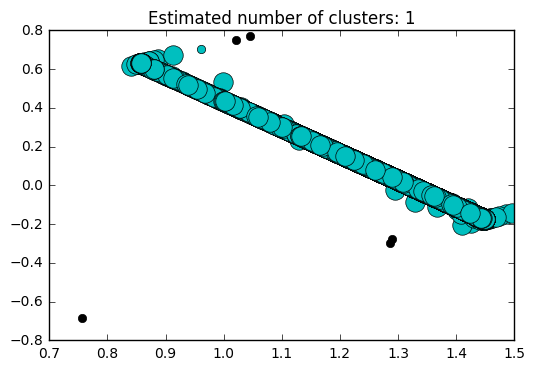

,Filename,EIN,Program_Exp,Liabilities_To_Asset,Working_Capital,Surplus_Margin,Total_Expenses
2035,201502969349300235.xml,680383921.0,0.000000,0.000000,172324.300000,0.000000,10.0
9921,201513179349308861.xml,311040228.0,0.000000,0.540167,149559.470000,1.000333,100.0
12048,201513179349305901.xml,166050703.0,1.000000,33.472201,-148963.563600,0.000000,220.0
18753,201513139349303196.xml,943152652.0,1.000000,254.451508,-7.144765,-250550.000000,250551.0
30433,201512599349300126.xml,232799695.0,0.985825,0.426822,2.387819,-54849.571430,202757.0


In [79]:
print(n_clusters_)

outliers_index = []
for i in range(len(labels)):
    if(labels[i]==-1):
        outliers_index.append(i)
        #print(df2.loc[i])
outliers = df2.loc[outliers_index]
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = 'cyan'
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

outliers


## Results: 

Outliers appear to be failing in different metrics. The first 2 fail at Program Expenses and have extremeley inflated Working Capitals.
The last two, despite having positive program expenses, have very high and negative surplus margins and are thus losing a lot of money.